# Liquid-liquid equilibrium in polymer solutions

## Estimation of Flory-Huggins interaction parameter from XS test data

### Paper 1

This notebook contains an estimation procedure for the parameters of the Flory-Huggins model applied to the LLE data presented in [MATOS *et al.* (2001)](https://onlinelibrary.wiley.com/doi/full/10.1002/1097-4628%2820010314%2979%3A11%3C2076%3A%3AAID-APP1017%3E3.0.CO%3B2-%23).

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from Tompa import Tompa

In [ ]:
####################
# EXPERIMENTAL DATA
####################

z_sol = 0.97738

labels = ['H1_9','H2_31','H3_8','H4_32','H5_29','H6_13','H8_11']

teta1 = 1e-4*np.array([[1.29, 0.000], [1.55, 0.0], [1.58, 1.163],
                       [1.63, 1.266], [1.37, 0.0], [1.39, 1.406],
                       [1.85, 0.0]])

teta2 = 1e-4*np.array([[6.08, 6.348], [5.61, 19.44], [6.57, 13.07],
                      [0.00, 10.52], [5.21, 12.38], [7.40, 16.21],
                      [6.31, 24.07]])

alpha = np.array([[0.868, 0.000],[0.237, 0.000],[0.549, 0.053],
                  [1.000, 0.145],[0.839, 0.000],[0.655, 0.083],
                  [0.353, 0.000]])

mw = np.array([582261, 242779, 349674, 514920, 540133, 435169, 246094])

xs = 1e-2*np.array([3.98, 4.58, 4.59, 3.43, 6.67, 6.48, 4.53])

# creating list of objects for each polymer
polymers = [Tompa(label=labels[i], z_sol = z_sol,
                  shulz_kind='3P', r_pol = np.arange(1e1,4e4),
                  teta1 = teta1[i], teta2 = teta2[i],
                  alpha = alpha[i],xs_fraction = xs[i]) 
            for i in range(len(labels))]


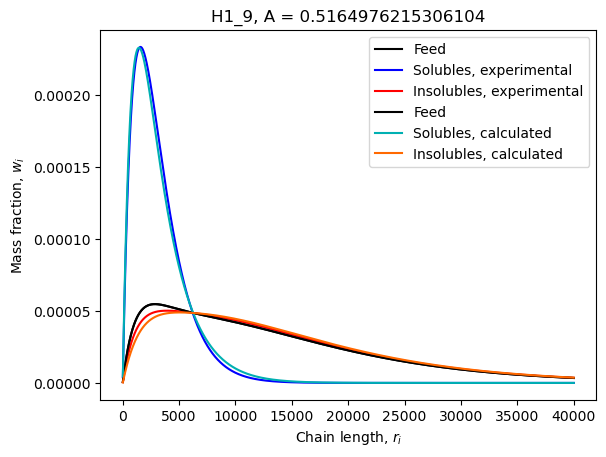

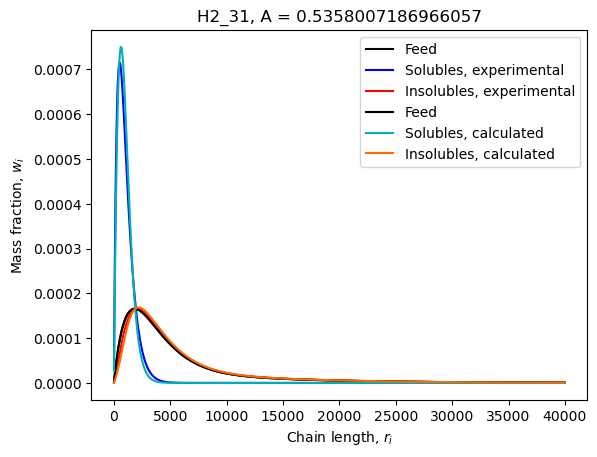

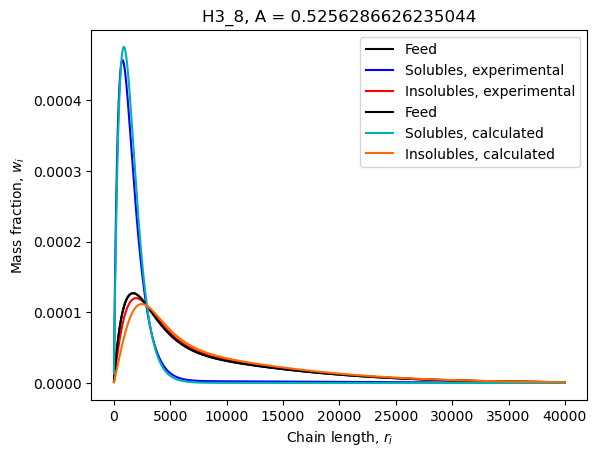

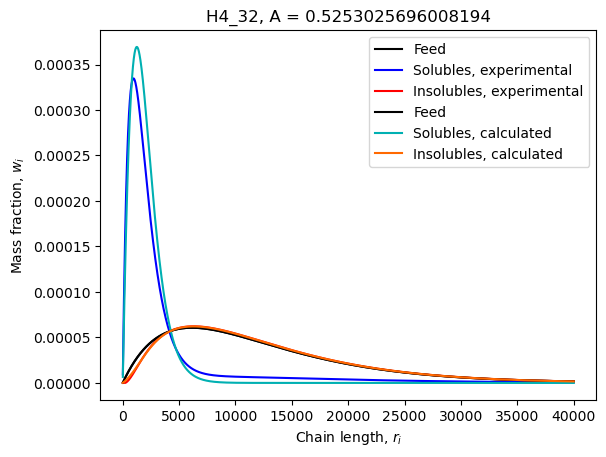

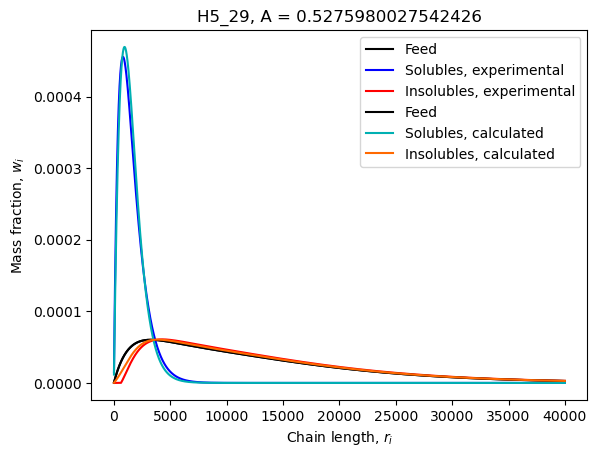

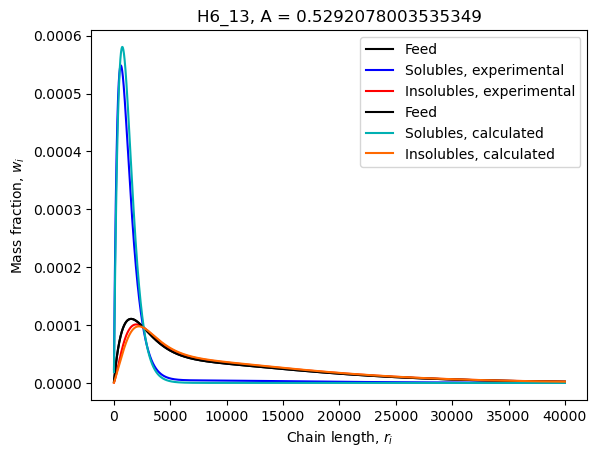

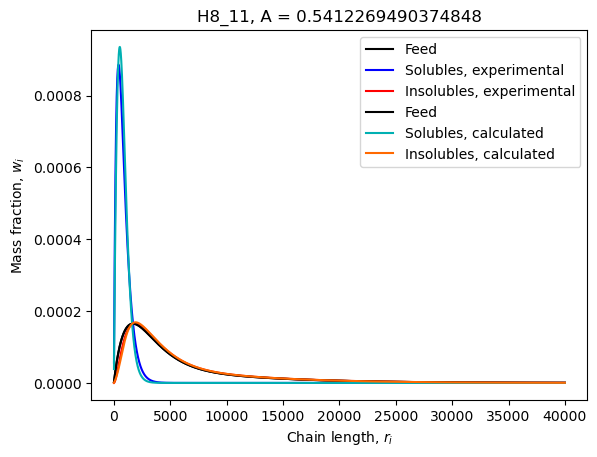

In [4]:
for p in polymers:
    p.estimation()
    plt.figure()
    p.plot_Experimental_Distributions()
    p.plot_Calculated_Distributions()

In [5]:
chi = [p.A for p in polymers]

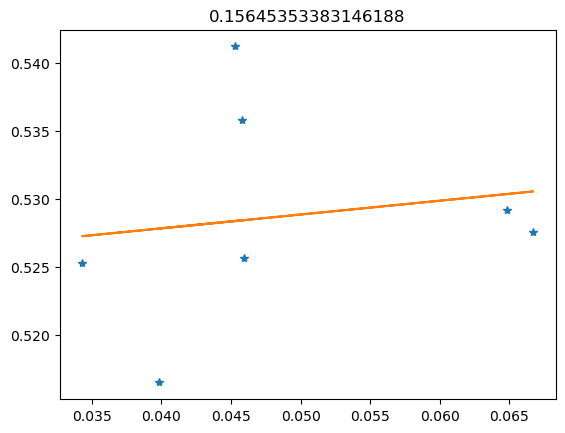

In [6]:
a, b = np.polyfit(xs, chi, 1)

plt.plot(xs,chi,'*');
plt.plot(xs,a*xs+b)
plt.title((np.corrcoef(xs, chi)[0,1]));

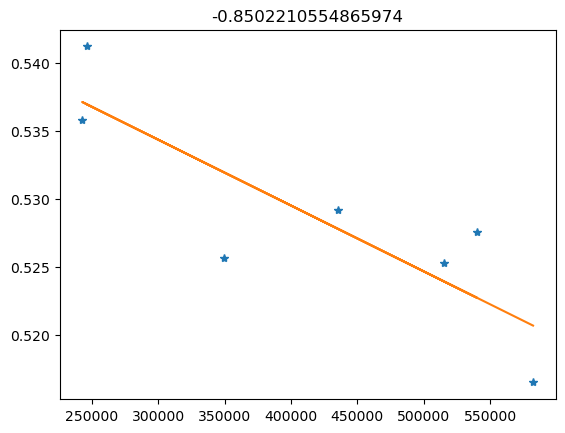

In [7]:
a, b = np.polyfit(mw, chi, 1)

plt.plot(mw,chi,'*');
plt.plot(mw,a*mw+b)
plt.title((np.corrcoef(mw, chi)[0,1]));